In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import jieba
import codecs
import jieba.analyse
import jieba.posseg as pseg
from wordcloud import WordCloud
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from collections import Counter

In [6]:
jieba.set_dictionary("jieba_dict.txt")

In [7]:
article = open("good.txt", "r", encoding='utf-8').read()

In [8]:
seq_list=jieba.cut_for_search(article,) 
print(list(seq_list))

Building prefix dict from C:\Users\litzu\Anaconda3\jieba_dict.txt ...
Loading model from cache C:\Users\litzu\AppData\Local\Temp\jieba.u3537158d2648b33770ebd2e71ba812eb.cache
Loading model cost 0.647 seconds.
Prefix dict has been built succesfully.


['\ufeff', 'Sony', ' ', 'XZP', '充電', '無', '反應', '修理', '主機', '機板', '主機板', '～', '推薦', '大家', '來', '這修', '唷', '～', '～', '在', '外修', '了', '好', '幾家', '都', '沒', '修好', ',', '來', '這一', '次', '搞定', '目前', '6', '/', '5', '拿手', '手機', '拿手機', '到', '現在', '都', '沒', '問題', '（', '之前', '修', '的', '回來', '最多', '撐', '3', '天', '，', '而且', '還是', '時好', '時懷', '就', '又', '不能', '充了', '）', '，', '老闆', '很', '有', '耐心', '服務', '很', '好', '～', '～', '\n', '我', '的', 'iPhone', '在', '出國', '前一刻', '撲街', '，', '液晶', '顯示', '顯示器', '壞掉', '，', '好', '在', '老闆', '幫', '我', '趕工', '修理', '理好', '修理好', '，', '還', '順道', '幫', '我換', '了', '新', '的', '保護', '貼', '，', '太', '佛心', '了', '。', '謝謝', '老闆', '讓', '我', '能', '帶', '著', '健康', '的', '手機', '出國', '照相', '！', '！', '！', '還教', '了', '我們', '許多', '保養', '手機', '的', '小', '秘訣', '！', '大大', '感謝', '！', '！', '\n', 's7e', ' ', '泡水', '受潮', '開機', '鍵', '無法', '使用', '，', '現場', '快速', '檢修', '到', '好', '，', '價格', '還', '很', '實在', '！', '\n', '更換', '電池', '速度', '快速', '，', '而且', '老闆', '人', '很', '客氣', '，', '幫忙', '處理', '很多', '東西', '，', '

In [9]:
#設定停止詞

In [10]:
 jieba.analyse.set_stop_words("stopwords.txt") 

In [11]:
with open(r'stopwords.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n')

In [12]:
terms = [t for t in jieba.cut(article, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True) 

[('', 366),
 ('\n', 46),
 ('服務', 15),
 ('維修', 15),
 ('老闆', 14),
 ('手機', 11),
 ('快速', 10),
 ('問題', 7),
 ('很好', 7),
 ('商品', 7),
 ('推薦', 6),
 ('非常', 6),
 ('店家', 6),
 ('親切', 6),
 ('修', 5),
 ('價格', 5),
 ('東西', 5),
 ('快', 5),
 ('找', 5),
 ('電腦', 5),
 ('商場', 5),
 ('家', 4),
 ('耐心', 4),
 ('幫', 4),
 ('速度', 4),
 ('很多', 4),
 ('合理', 4),
 ('會', 4),
 ('時間', 4),
 ('需要', 4),
 ('買', 4),
 ('美食', 4),
 ('3C', 4),
 ('比價', 4),
 ('電子', 4),
 ('產品', 4),
 ('修理', 3),
 ('次', 3),
 ('搞定', 3),
 ('理好', 3),
 ('現場', 3),
 ('換電', 3),
 ('電池', 3),
 ('處理', 3),
 ('小時', 3),
 ('高', 3),
 ('分鐘', 3),
 ('好了', 3),
 ('專業', 3),
 ('值得', 3),
 ('態度', 3),
 ('RealFix', 3),
 ('環境', 3),
 ('詳細', 3),
 ('價錢', 3),
 ('零件', 3),
 ('比較', 3),
 ('方便', 3),
 ('多元', 3),
 ('找到', 3),
 ('應該', 3),
 ('買到', 3),
 ('充電', 2),
 ('都沒', 2),
 ('修好', 2),
 ('這一', 2),
 ('現在', 2),
 ('之前', 2),
 ('時', 2),
 ('很有', 2),
 ('出國', 2),
 ('修理好', 2),
 ('謝謝', 2),
 ('大大', 2),
 ('感謝', 2),
 ('無法', 2),
 ('實在', 2),
 ('推', 2),
 ('就能', 2),
 ('修復', 2),
 ('螢幕', 2),
 ('很快', 2),
 ('十分', 2),
 ('

In [13]:
#將好評輸入進來並用jieba進行斷字

In [14]:
with open("good.txt", "r", encoding='utf-8') as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,20)       

        print(",".join(words))
f1.close()

Sony,XZP,充電,反應,主機板,推薦,這修,外修,幾家,這一,拿手機,現在,問題,回來,時好,時懷,充了,老闆,服務,搞定
出國,老闆,手機,佛心,iPhone,撲街,顯示器,壞掉,趕工,修理好,順道,我換,保護,謝謝,還教,保養,秘訣,感謝,前一刻,液晶
s7e,開機,無法,現場,檢修,價格,實在,泡水,受潮,快速,使用
更換,電池,老闆,客氣,幫忙,處理,東西,快速,速度,非常,很多
沒想到,半小時,修復,手機,螢幕,CP,超級,全新
維修,充電,四十分鐘,處理好,背板,快速,不到
修理好,困擾,問題,專業,推薦,店家,已久,值得,快速,非常
維修,店員,服務,態度
維修,RealFix,手機,智慧型,Realfix,原廠,服務,排隊,對什麼,型號,裝潢,風格,滿前,現場,音樂,氣氛,舒適,環境,老闆,帥哥
老闆,服務,實在,太棒,電池,20,分鐘,手機,問題,過來,搞定
維修,老闆,親切,細心,問題,介紹,朋友,快速,一定
優惠,阿莎力,老板,快速
來換,電池,服務,推薦,值得,速度
環境,舒適,解說,詳細,技術,推薦,維修,安心,值得,中心
認真,負責,服務,態度,感謝,手機,新生,大大,良好,十分
老闆,我問,無法,LG,G3,還幫,處理,手機,設定,問題,女兒,開心,真神,修好,居然
超快,10,分鐘,好了,價格,優惠,服務,親切,超棒,速度
服務,人員,熱心,誠懇,快速,安全
服務,品質,人員,親切,快速
老闆,親切,店內,裝潢,推薦,維修,特色,非常
價錢,維修,時間,延長,公道,事先,通知,需要
保固,修復,超快,測試,OK,費用,螢幕,三個,耐心,收取,等待
老闆,現場,維修,Hen,一小時,以內,推薦,這一,搞定,幽默,耐心,效率
服務,超好,親切,專業,價美,快速
謝謝,服務,收費,合理,快速
人好,親切,詳細,問題,耐心,原因,分析
服務,老闆,樂意,問題,回答,非常
詳細,檢測,細心,服務,態度,價錢,合理
服務,不錯,光顧,需要
維修,這家,著來,試試看,心態,asus,手機,一個,小時,取件,時間,對面,麥當勞,老闆,二手,逛逛,商店,先生,孩子,附近
手機,維修
電腦,零件,種類,周邊,薛一波,要來,功課,比較,意外,之前,了解,非常,可能
3C,老闆,仔細,觀察,意謂,價位,選擇,變少,店家,用品,同一,知道
樓層,樓有,美

In [15]:
data= open("good_tag.txt", "r", encoding='utf-8').read()

In [16]:
#取出前十大關鍵字，可看出比重

In [17]:
kw = jieba.analyse.extract_tags(data, topK=10, withWeight=True, allowPOS=())
kw

[('服務', 0.3837332778708642),
 ('維修', 0.3246973889676543),
 ('老闆', 0.26566150006444444),
 ('手機', 0.2361435556128395),
 ('推薦', 0.17710766670962963),
 ('問題', 0.17710766670962963),
 ('親切', 0.17710766670962963),
 ('東西', 0.1475897222580247),
 ('3C', 0.1475897222580247),
 ('快速', 0.14214493025185185)]

In [18]:
#取出前200大關鍵字

In [19]:
key=jieba.analyse.extract_tags(data,topK=200)
print("/".join(key))

服務/維修/老闆/手機/推薦/問題/親切/東西/3C/快速/店家/價格/電腦/比價/電子/商場/電池/態度/詳細/價錢/時間/應該/美食街/非常/充電/這一/修理好/無法/現場/實在/處理/修復/螢幕/專業/原廠/分鐘/細心/優惠/環境/超快/人員/一個/種類/比較/光華/三創/豐富/設備/週邊/產品/買到/應有盡有/多元/值得/合理/零件/速度/商品/耐心/保固/意外/方便/佛心/Sony/XZP/反應/主機板/這修/外修/幾家/出國/iPhone/撲街/顯示器/壞掉/趕工/s7e/開機/檢修/更換/客氣/幫忙/沒想到/半小時/CP/超級/四十分鐘/處理好/困擾/店員/RealFix/智慧型/Realfix/排隊/對什麼/型號/太棒/20/過來/介紹/阿莎力/來換/舒適/解說/技術/認真/負責/感謝/我問/LG/G3/還幫/設定/10/好了/超棒/熱心/誠懇/品質/店內/裝潢/延長/測試/OK/費用/三個/Hen/一小時/以內/超好/價美/謝謝/收費/人好/樂意/檢測/不錯/光顧/這家/著來/試試看/心態/asus/小時/周邊/薛一波/要來/功課/仔細/觀察/意謂/價位/選擇/變少/樓層/樓有/美食區/大致上/電梯/旁有/配置圖/找尋/廠家/聖地/停車/停車場/旁邊/眾多/滿意/相當/建議/網路/分類/雜亂/重覆/適合/喜歡/DIY/悠遊/場所/不一定/鄰近/大學/巷弄/親民/平價/維護/其實/寶庫/這裏/找找/臺灣/提款機/幾乎/一點/浪費/買不到/裡面/沒有/PC


In [20]:
#載入相關套件，畫出文字雲

In [21]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from scipy.misc import imread 

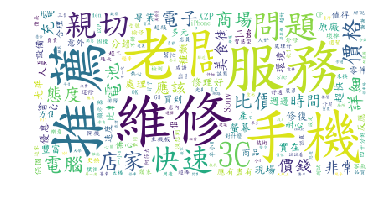

<Figure size 3000x2000 with 0 Axes>

In [36]:
text = open('top200.txt', "r", encoding='utf-8').read()
stopwords = {}.fromkeys(["這一","無法","東西","我問","RealFix"]) #刪掉一些不重要的字 

wc = WordCloud(font_path='kaiu.ttf',     #設定字體，不然中文會顯示不出來
               background_color="white", #背景設為白色，默認為黑色
               max_words = 500 , 
               stopwords=stopwords)
wc.generate(text)
plt.imshow(wc)  # 繪製圖片
plt.axis("off") #消除坐標軸
plt.figure(figsize=(30,20), dpi = 100)
plt.show() #展示圖片